# Measuring chance

<b>What's the probability of an event?</b>
<p>P(event) = # ways event can happen/total # of possible outcomes</p>
<p>Example: a coin flip</p>
<p>P(heads) = 1 way to get heads/2 possible outcomes = 1/2 = 50%</p>

## Calculating probabilities
<p>You're in charge of the sales team, and it's time for performance reviews, starting with Amir. As part of the review, you want to randomly select a few of the deals that he's worked on over the past year so that you can look at them more deeply. Before you start selecting deals, you'll first figure out what the chances are of selecting certain deals.</p>

In [108]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [109]:
#Dataset = amir_deals
dataset = pd.read_csv('dataset/amir_deals.csv', usecols =['product','client','status','amount','num_users'])

In [110]:
dataset.head()

,product,client,status,amount,num_users
0,Product F,Current,Won,7389.52,19
1,Product C,New,Won,4493.01,43
2,Product B,New,Won,5738.09,87
3,Product I,Current,Won,2591.24,83
4,Product E,Current,Won,6622.97,17


In [111]:
#Count the number of deals Amir worked on for each product type and store in counts.

counts = dataset['product'].value_counts()
counts

Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: product, dtype: int64

In [112]:
#Calculate the probability of selecting a deal for the different product types by dividing the counts 
#by the total number of deals Amir worked on.

probs = counts/dataset.shape[0]
probs

Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: product, dtype: float64

<hr/>
<p><b>Assigning Sales People</b>
    
Let's look at a more complex scenario. There's a meeting coming up with a potential client, and we want to send someone from the sales team to the meeting. We'll put each person's name on a ticket in a box and pull one out randomly to decide who goes to the meeting.

Let <b>Amir, Brian, Claire and Damian</b> be the 4 sales people in a team with number of sales <b>[178, 128, 75, 69]</b> respectively.

</p>

In [113]:
sales_people = {
    'name': ['Amir', 'Brian', 'Claire', 'Damian'],
    'n_sales': [178, 128, 75, 69]
}

In [114]:
sales_count = pd.DataFrame(sales_people)

In [115]:
sales_count

,name,n_sales
0,Amir,178
1,Brian,128
2,Claire,75
3,Damian,69


<b>Brian's</b> name gets pulled out. The probability of Brian being selected is one out of four, or 25%.

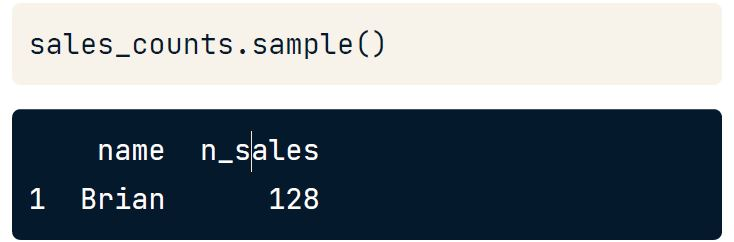

<p>We can recreate this scenario in Python using the <b>sample()</b> method. By default, it randomly samples one row from the DataFrame. However, if we run the same thing again, we may get a different row since the sample method chooses randomly. If we want to show the team how we picked Brian, this won't work well.</p>

<p>To ensure we get the same results when we run the script in front of the team, we'll set the random seed using <b>np.random.seed</b>. The seed is a number that Python's random number generator uses as a starting point, so if we orient it with a seed number, it will generate the same random value each time. The number itself doesn't matter. We could use 5, 139, or 3 million. The only thing that matters is that we use the same seed the next time we run the script. Now, we, or one of the sales-team members, can run this code over and over and get Brian every time.
    
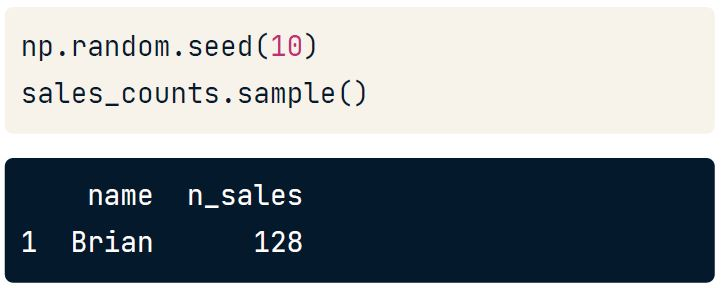

## Sampling deals
<p>In the previous exercise, you counted the deals Amir worked on. Now it's time to randomly pick five deals so that you can reach out to each customer and ask if they were satisfied with the service they received. You'll try doing this both with and without replacement.

Additionally, you want to make sure this is done randomly and that it can be reproduced in case you get asked how you chose the deals, so you'll need to set the random seed before sampling from the deals.</p>

In [116]:
#Set random seed
np.random.seed(42)

In [117]:
# Sample 5 deals without replacement
samples_without_replacement = dataset.sample(5)
samples_without_replacement

,product,client,status,amount,num_users
19,Product I,Current,Won,3220.45,45
45,Product B,Current,Won,8614.12,17
140,Product B,Current,Lost,5856.18,45
30,Product C,New,Won,6151.14,66
67,Product B,Current,Won,4571.26,19


In [118]:
# Sample 5 deals with replacement
samples_with_replacement = dataset.sample(5, replace = True)
samples_with_replacement

,product,client,status,amount,num_users
120,Product D,Current,Lost,8180.81,96
115,Product F,Current,Lost,1664.40,58
2,Product B,New,Won,5738.09,87
102,Product D,New,Lost,1196.53,63
154,Product B,Current,Lost,6979.77,8


<p><b>It's important to consider how you'll take a sample since there's no one-size-fits-all way to sample, and this can have an effect on your results.</b></p>

## Discrete Distributions

In [119]:
die = [1,2,3,4,5,6]

In [120]:
#Even Die
roll_die = pd.DataFrame(die, columns=['Die'])

In [121]:
#Probability of each possible outcome
roll_die['prob'] = 1 / roll_die.shape[0]

In [122]:
roll_die

,Die,prob
0,1,0.166667
1,2,0.166667
2,3,0.166667
3,4,0.166667
4,5,0.166667
5,6,0.166667


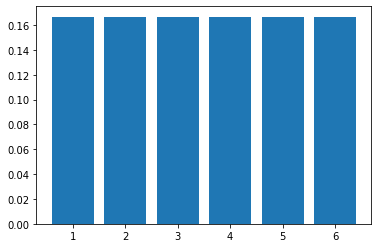

In [123]:
#Visualizing a probability distribution
plt.bar(x=roll_die['Die'], height=roll_die['prob'])
plt.show()

In [124]:
#Expected value: mean of a probability distribution
np.mean(roll_die['Die'])

3.5

In [125]:
#Sampling from discrete distributions
roll_10 = roll_die.sample(10, replace = True)
# roll_10

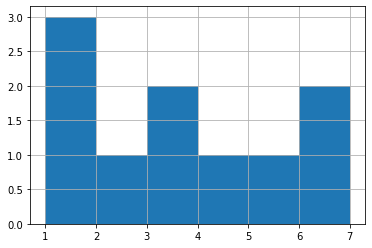

In [126]:
#Visualizing a sample
roll_10['Die'].hist(bins=np.linspace(1,7,7))
plt.show()

In [127]:
#Mean of sample 10 rolls
mean_roll_10 = np.mean(roll_10['Die'])
mean_roll_10

3.2

<p><b>Sampled Meand = 3.3 which is close to the expected value (Theoretical probability distribution) i.e. 3.5</b></p>

<p>If we roll the die 100 times, the distribution of the rolls looks a bit more even, and the mean is closer to 3.5.</p>
<p>If we roll 1000 times, it looks even more like the theoretical probability distribution and the mean closely matches 3.5.</p>
<p>This is called the <b>law of large numbers</b>, which is the idea that as the size of your sample increases, the sample mean will approach the theoretical mean.</p>

## Continuous Distribution

<p>Let's start with an example. The city bus arrives once every twelve minutes, so if you show up at a random time, you could wait anywhere from 0 minutes if you just arrive as the bus pulls in, up to 12 minutes if you arrive just as the bus leaves.

Let's model this scenario with a probability distribution. There are an infinite number of minutes we could wait since we could wait 1 minute, 1-point-5 minutes, 1-point-53 minutes, and so on, so we can't create individual blocks like we could with a discrete variable.

Instead, we'll use a continuous line to represent probability. The line is flat since there's the same probability of waiting any time from 0 to 12 minutes. This is called the <b>continuous uniform distribution</b>.</p>

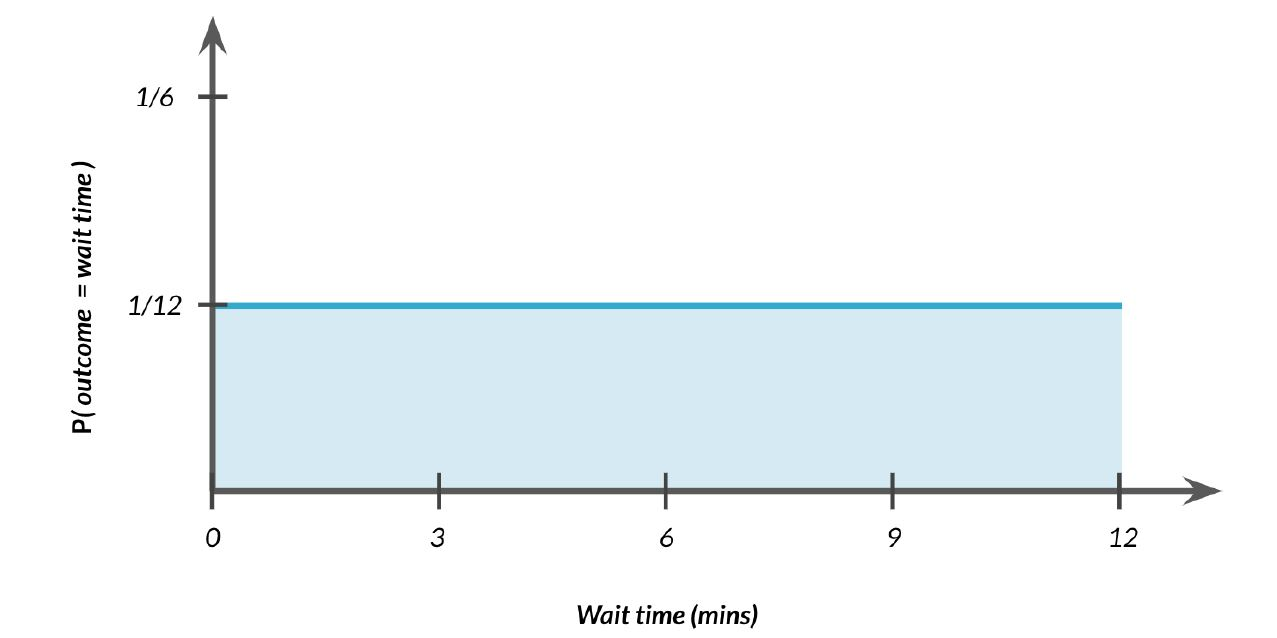

<p><b>Scenario</b></p>
<p>The sales software used at your company is set to automatically back itself up, but no one knows exactly what time the back-ups happen. It is known, however, that back-ups happen exactly every 30 minutes. Amir comes back from sales meetings at random times to update the data on the client he just met with. He wants to know how long he'll have to wait for his newly-entered data to get backed up.</p>

<p>To model how long Amir will wait for a back-up using a continuous uniform distribution, save his lowest possible wait time as min_time and his longest possible wait time as max_time. Remember that back-ups happen every 30 minutes.</p>

In [128]:
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

In [129]:
# Import uniform from scipy.stats
from scipy.stats import uniform

# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5, 0, 30)
print(prob_less_than_5)

0.16666666666666666


In [130]:
# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = 1 -uniform.cdf(5, 0, 30)
print(prob_greater_than_5)

0.8333333333333334


In [131]:
# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20, 0, 30) - uniform.cdf(10, 0, 30)
print(prob_between_10_and_20)

0.3333333333333333


In [132]:
#Generating random numbers according to uniform distribution
uniform.rvs(0, 5, size=10)

array([2.01918086, 0.32446124, 1.26957707, 1.23438031, 3.48152136,
       3.56135295, 0.74043465, 4.98870243, 1.33390507, 4.88307478])